<a href="https://colab.research.google.com/github/maitri-7/DaLab/blob/main/Kaggle/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [74]:
titanic = pd.read_csv("./train.csv", index_col=0)
titanic_final = pd.read_csv("./test.csv", index_col=0)

In [75]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
print('--'*25)
print('The shape of the training data is : {}'.format(titanic.shape))
print('--'*25)
print('The shape of the test data is     : {}'.format(titanic_final.shape))
print('--'*25)

--------------------------------------------------
The shape of the training data is : (891, 11)
--------------------------------------------------
The shape of the test data is     : (418, 10)
--------------------------------------------------


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [78]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [79]:
df = pd.read_csv("./train.csv")
df.head()
titanic_test = titanic[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic_test["Family"] = titanic["SibSp"] + titanic["Parch"]
avg_age = titanic_test["Age"].dropna().mean()
titanic_test = titanic_test.dropna(subset=["Embarked"])

In [80]:
titanic_test["Age"] = titanic_test["Age"].fillna(avg_age.round(0))
titanic_test["Sex"] = titanic_test["Sex"].replace(["female", "male"], [0,1])
titanic_test["Embarked"] = titanic_test["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])

In [81]:
X_train_set = titanic_test[["Pclass", "Sex", "Age", "Fare", "Embarked", "Family"]]
y_train_set = titanic_test["Survived"]


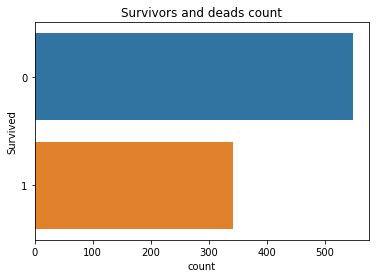

In [82]:
g = sns.countplot(y=titanic['Survived']).set_title('Survivors and deads count')

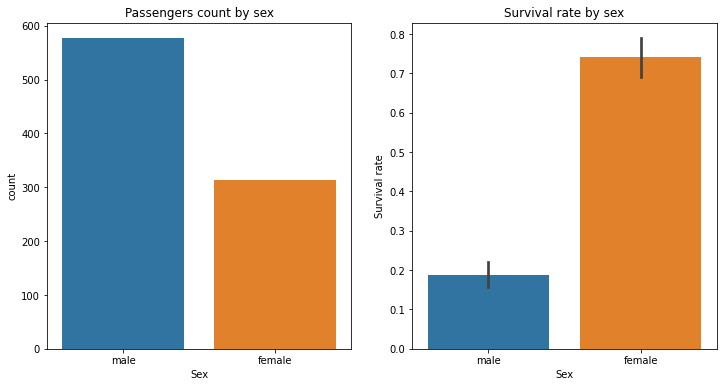

In [83]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(titanic['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=titanic, ax=axarr[1]).set_ylabel('Survival rate')

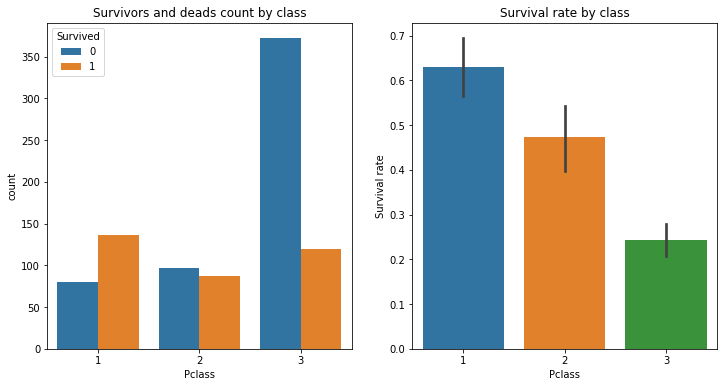

In [84]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=titanic, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=titanic, ax=axarr[1]).set_ylabel('Survival rate')

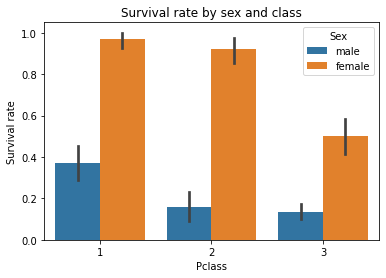

In [85]:
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic).set_ylabel('Survival rate')

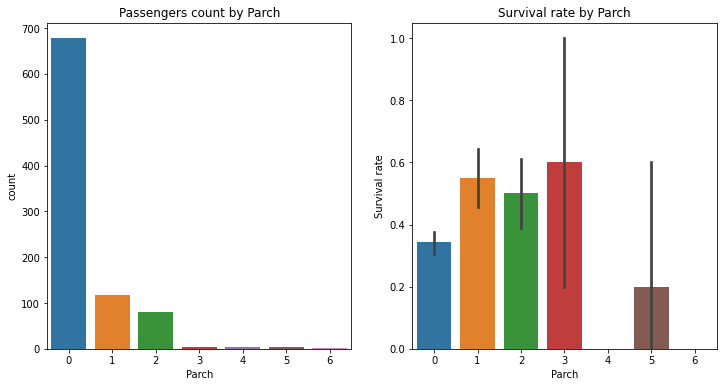

In [86]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(titanic['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=titanic, ax=axarr[1]).set_ylabel('Survival rate')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set, y_train_set, test_size=0.20, random_state=10)
print(X_train, y_train)

             Pclass  Sex   Age     Fare  Embarked  Family
PassengerId                                              
58                3    1  28.5   7.2292         2       0
718               2    0  27.0  10.5000         1       0
823               1    1  38.0   0.0000         1       0
398               2    1  46.0  26.0000         1       0
165               3    1   1.0  39.6875         1       5
...             ...  ...   ...      ...       ...     ...
371               1    1  25.0  55.4417         2       1
322               3    1  27.0   7.8958         1       0
529               3    1  39.0   7.9250         1       0
127               3    1  30.0   7.7500         3       0
267               3    1  16.0  39.6875         1       5

[711 rows x 6 columns] PassengerId
58     0
718    1
823    0
398    0
165    0
      ..
371    1
322    0
529    0
127    0
267    0
Name: Survived, Length: 711, dtype: int64


In [88]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.70      0.74        63

    accuracy                           0.83       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.83      0.82       178



In [89]:
print(confusion_matrix(y_test, y_pred))

[[103  12]
 [ 19  44]]


In [90]:
titanic_final.loc[titanic_final["Fare"].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [91]:
titanic_test_final = titanic_final[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
titanic_test_final["Family"] = titanic_final["SibSp"] + titanic_final["Parch"]
avg_age = titanic_test_final["Age"].dropna().mean()
titanic_test_final = titanic_test_final.dropna(subset=["Embarked"])
print(titanic_test_final.head(3))

             Pclass     Sex   Age    Fare Embarked  Family
PassengerId                                               
892               3    male  34.5  7.8292        Q       0
893               3  female  47.0  7.0000        S       1
894               2    male  62.0  9.6875        Q       0


In [92]:
titanic_test_final["Age"] = titanic_test_final["Age"].fillna(avg_age)
titanic_test_final["Sex"] = titanic_test_final["Sex"].replace(["female", "male"], [0,1])
titanic_test_final["Embarked"] = titanic_test_final["Embarked"].replace(["S", "C", "Q"], [1, 2, 3])
print(titanic_test_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    int64  
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 22.9 KB
None


In [93]:
Pclass3Fareavg = titanic_test_final.loc[titanic_test_final["Pclass"] == 3]["Fare"].mean()
titanic_test_final = titanic_test_final.fillna(Pclass3Fareavg)
titanic_test_final.head()

,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,
892,3,1,34.5,7.8292,3,0
893,3,0,47.0,7.0000,1,1
894,2,1,62.0,9.6875,3,0
895,3,1,27.0,8.6625,1,0
896,3,0,22.0,12.2875,1,2


In [94]:
y_final = LR.predict(titanic_test_final)

In [101]:
titanic_final.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [95]:
final = pd.DataFrame(y_final, index=titanic_final.index)
final.columns=["Survived"]

In [96]:
final

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [36]:
final.to_csv("submission.csv")